## **Classificação Supervisionada**

Importando bibliotecas e definindo versões necessárias para o script:

In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from zlib import crc32
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import sys
assert sys.version_info >= (3, 5)

import os


O dataset usado pode ser encontrado no kaggle: https://www.kaggle.com/datasets/umangsinghal5/nutritional-and-carbon-footprint-data-of-indian-diet 

Foi baixado e está no diretório archive.


In [6]:
df = pd.read_csv('/UFU/IC/onboarding/src/semana_6/indian_food.csv', 
                 sep=',', 
                 encoding='utf-8',
                 on_bad_lines='skip',  
                 quotechar='"',
                 skipinitialspace=True)
df.head()

,Food,Associativity,Region,Type,Category,Allergy,Serving,Total Weight (gms),Energy(kcal),Proteins,Carbohydrates,Fats,Fiber,Carbon Footprint(kg CO2e),Ingredients
0,Soya flour Gobi stuffed paratha,1,"North,West","Breakfast,Lunch,Dinner",Veg,soy,2 medium,393,235,16.0,24.0,7.0,8.0,0.39450,Cauliflower-15 gms; Onion-15 gms; Ginger-4 gm...
1,DUMPLINGS (Veg),0,East,"Appetizer,Snacks",Veg,soy,4 medium,255,115,4.0,22.0,1.0,4.0,0.25955,carrot-15 gms; CABBAGE-15 gms; Capsicum-15 gms...
2,Baked Vegetables,0,Continental,Appetizer,Veg,soy,4 small,83,17,0.0,1.0,1.0,0.0,0.15840,Cauliflower-20 gms; carrot-20 gms;Capsicum-20 ...
3,LETTUCE WRAP (Chicken),0,Continental,"Lunch,Dinner",Non-veg,soy,1 medium,369,214,20.0,10.0,9.0,4.0,0.69985,Lettuce Leaf-20 gms; Chicken-70 gms; Tomato-12...
4,Soya Sizzler,6,Continental,"Lunch,Dinner",Veg,soy,1 medium,567,305,28.0,21.0,10.0,9.0,0.65800,Soyabean-30 gms; Ginger-15 gms;Garlic-15 gms; ...


In [7]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

informações sobre o dataset:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Food                       753 non-null    object 
 1   Associativity              753 non-null    object 
 2   Region                     753 non-null    object 
 3   Type                       753 non-null    object 
 4   Category                   753 non-null    object 
 5   Allergy                    753 non-null    object 
 6   Serving                    753 non-null    object 
 7   Total Weight (gms)         753 non-null    int64  
 8   Energy(kcal)               753 non-null    int64  
 9   Proteins                   753 non-null    float64
 10  Carbohydrates              753 non-null    float64
 11  Fats                       753 non-null    float64
 12  Fiber                      753 non-null    float64
 13  Carbon Footprint(kg CO2e)  753 non-null    float64

Verificando se há valores ausentes:

In [9]:
df.isnull().sum()

Food                         0
Associativity                0
Region                       0
Type                         0
Category                     0
Allergy                      0
Serving                      0
Total Weight (gms)           0
Energy(kcal)                 0
Proteins                     0
Carbohydrates                0
Fats                         0
Fiber                        0
Carbon Footprint(kg CO2e)    0
Ingredients                  0
dtype: int64

Não há valores ausentes na tabela

Algumas estatística de colunas numéricas:

In [10]:
df.describe()

,Total Weight (gms),Energy(kcal),Proteins,Carbohydrates,Fats,Fiber,Carbon Footprint(kg CO2e)
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,405.764940,259.310757,12.442629,32.025100,9.912882,7.127092,0.657318
std,278.924944,249.186947,18.894055,70.673733,14.048815,13.058121,0.684704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,98.000000,3.000000,8.000000,1.000000,2.000000,0.211600
50%,357.000000,192.000000,7.000000,18.000000,6.000000,4.000000,0.471500
75%,539.000000,331.000000,15.000000,38.000000,12.000000,9.000000,0.815500
max,2065.000000,1826.000000,275.000000,1548.000000,136.000000,288.000000,7.598950


Observando dados de colunas do tipo objeto:

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print("\n")

Food
Jowar Cheela                         2
Upma                                 2
Saute Tofu                           2
Soya Flour Cheela                    2
Hung Curd Salad                      2
                                    ..
Lemon Water                          1
Dalcheeni Water                      1
Besan Cheela                         1
Filter Coffee Without Sugar          1
Black Filter Coffee Without Sugar    1
Name: count, Length: 748, dtype: int64


Associativity
0      268
2       95
1       87
6       61
12      47
10      36
9       33
11      33
4       21
3       15
14      13
8       13
5       12
2,8      9
7        6
13       4
Name: count, dtype: int64


Region
Continental                          253
North,East,West                      199
North,South,East,West                 75
Continental,North,South,East,West     51
South                                 45
North,East,West,South                 38
North,West                            25
East         

**Gráficos para Análise**

Saving figure attribute_histogram_plots


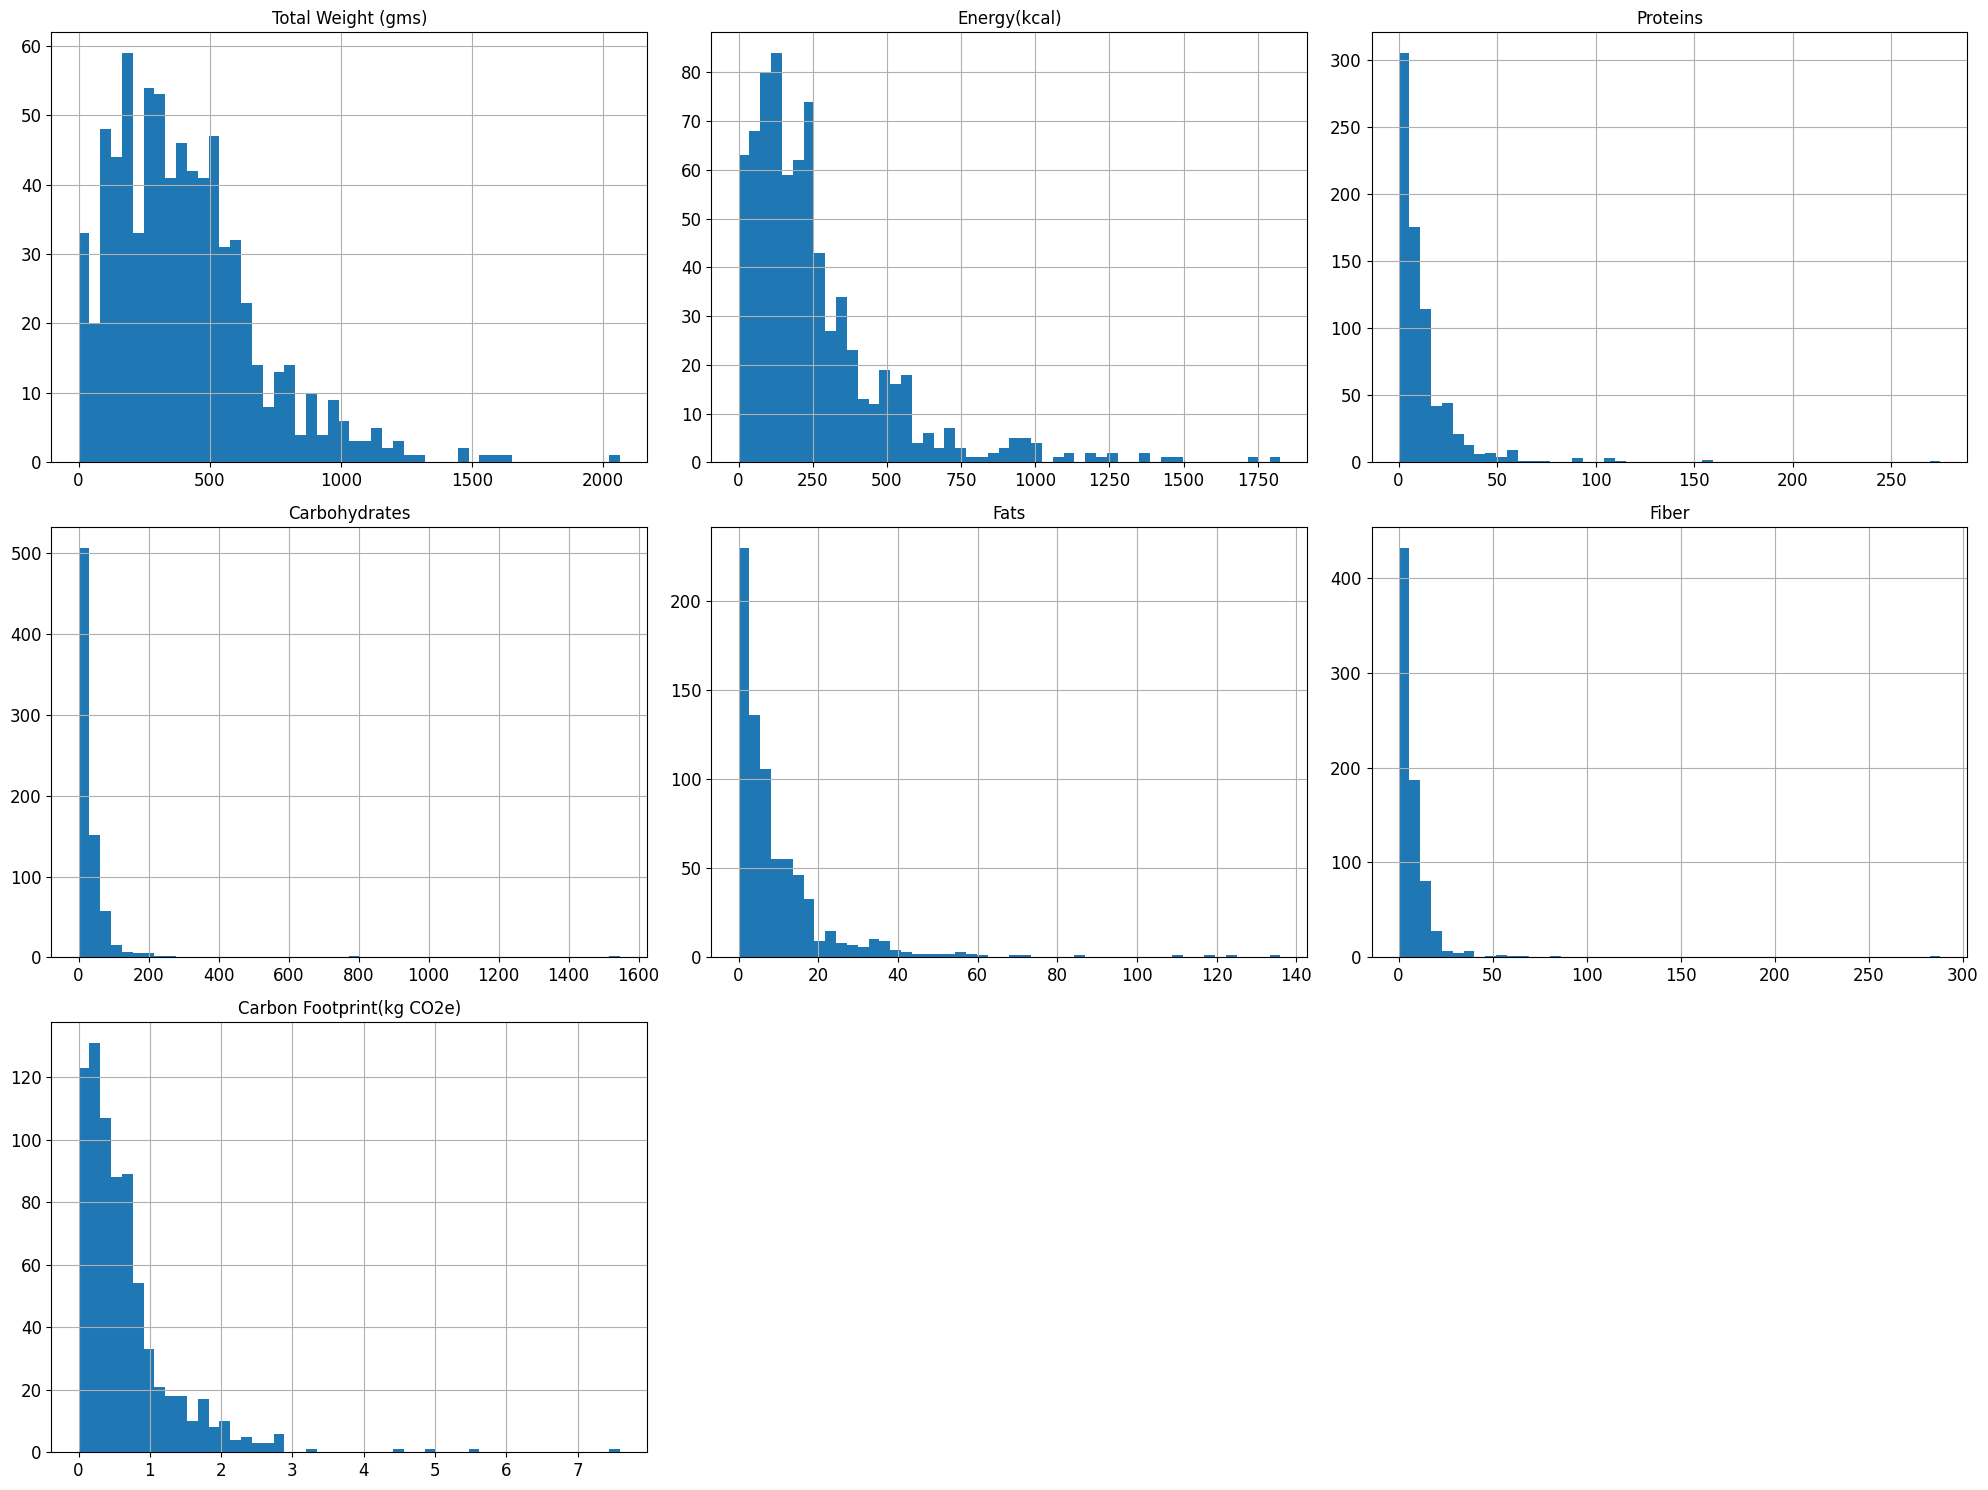

In [12]:
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

*Gráficos para análises nutricionais e ambientais:*

Distribuição de nutrientes:

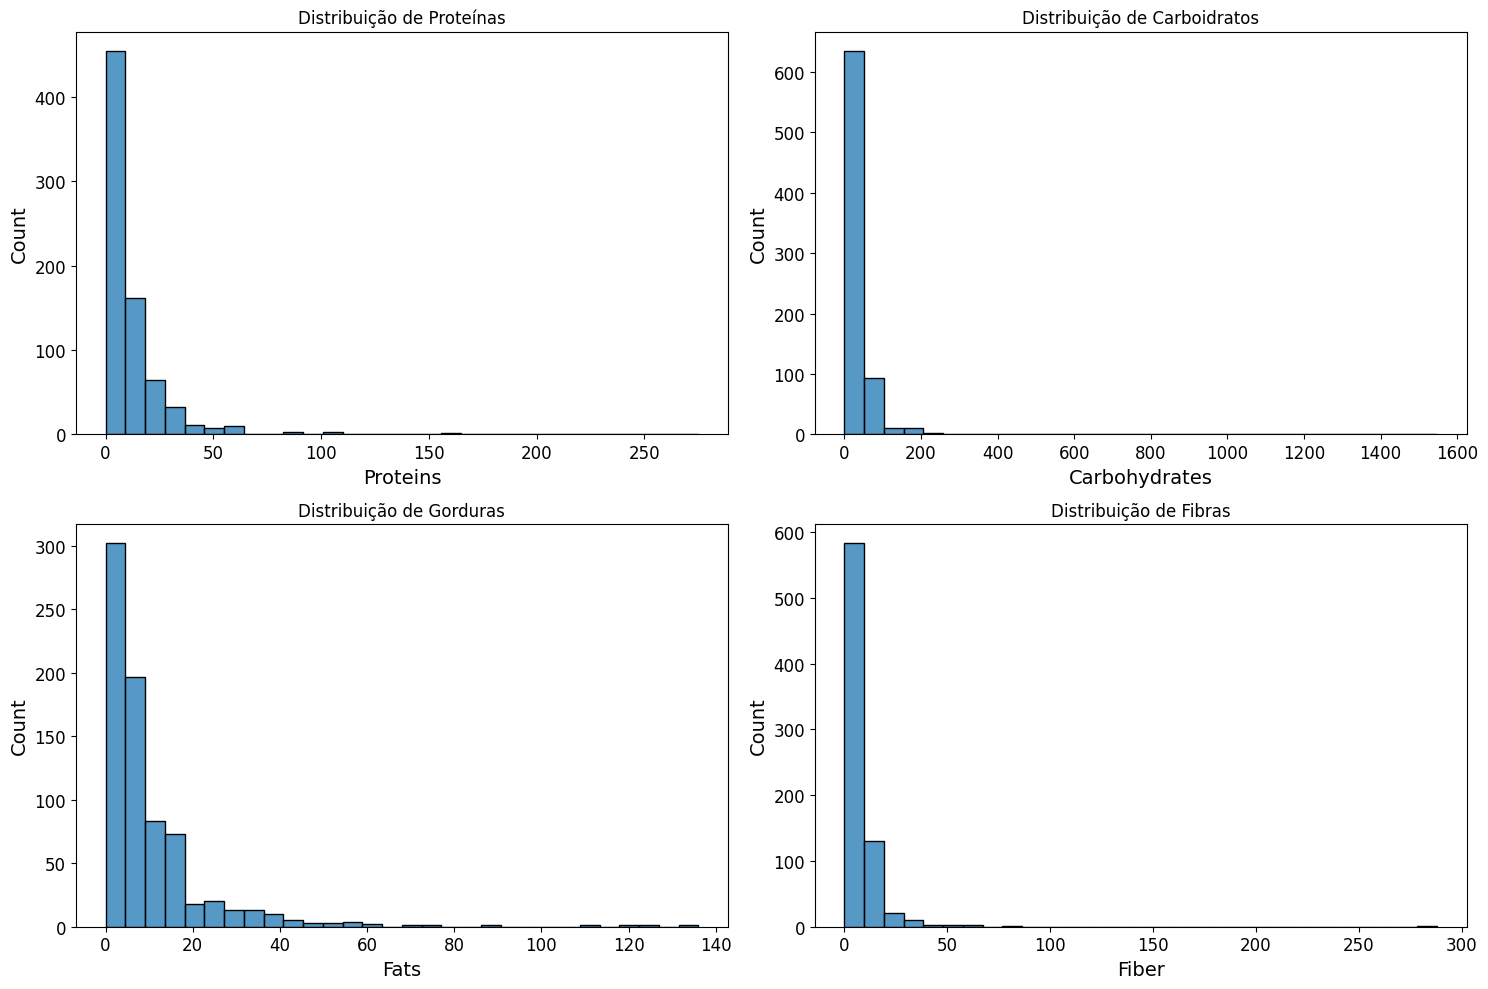

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Proteins'], bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribuição de Proteínas')

sns.histplot(df['Carbohydrates'], bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribuição de Carboidratos')

sns.histplot(df['Fats'], bins=30, ax=axes[1,0])
axes[1,0].set_title('Distribuição de Gorduras')

sns.histplot(df['Fiber'], bins=30, ax=axes[1,1])
axes[1,1].set_title('Distribuição de Fibras')

plt.tight_layout()
plt.show()


Quais alimentos tem mais calorias:

<Axes: xlabel='Energy(kcal)', ylabel='Food'>

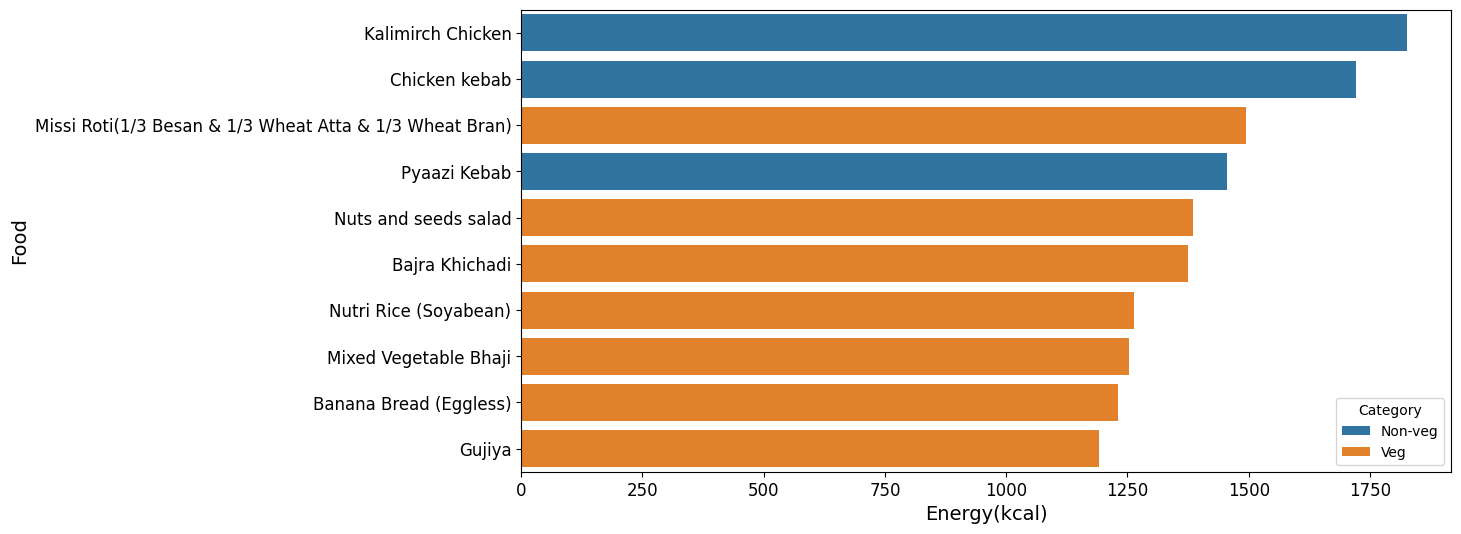

In [14]:
mais_calorias = df.nlargest(10, 'Energy(kcal)')
plt.figure(figsize=(12, 6))
sns.barplot(data=mais_calorias, x='Energy(kcal)', y='Food', hue='Category')

Quais categorias de alimentos oferecem mais energia:

([0, 1, 2],
 [Text(0, 0, 'Veg'), Text(1, 0, 'Non-veg'), Text(2, 0, 'Eggetarian')])

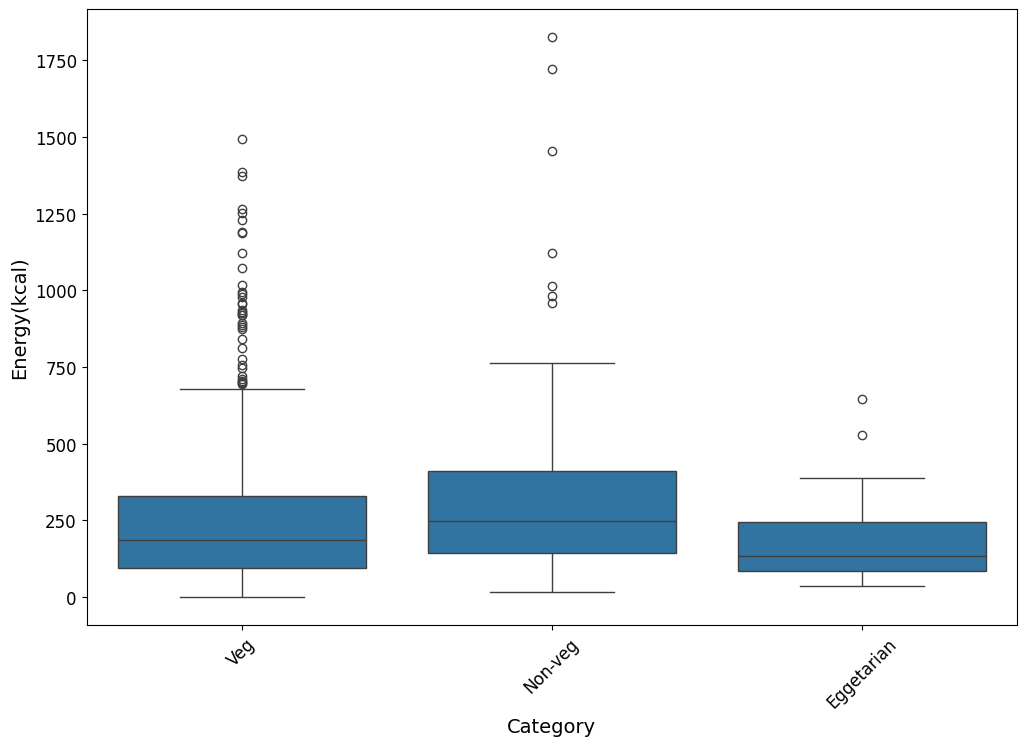

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Category', y='Energy(kcal)')
plt.xticks(rotation=45)

Pegada de carbono vs calorias:

<Axes: xlabel='Energy(kcal)', ylabel='Carbon Footprint(kg CO2e)'>

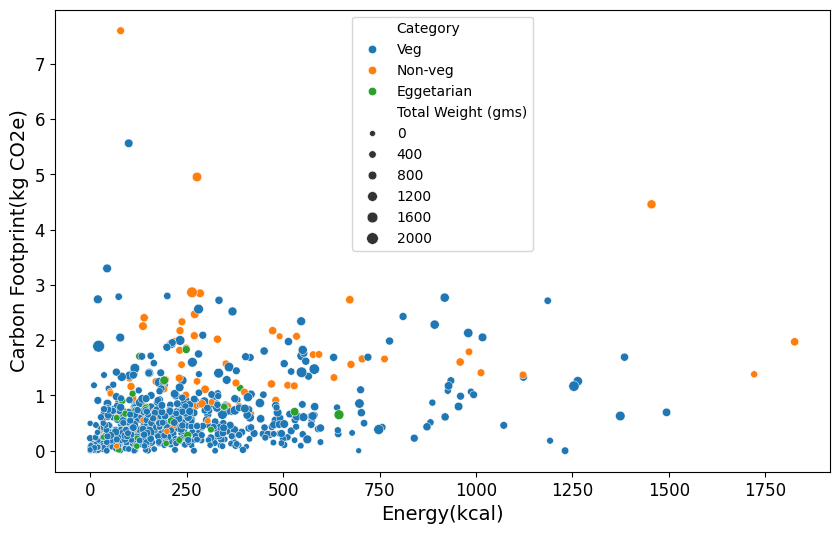

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Energy(kcal)', y='Carbon Footprint(kg CO2e)', 
                hue='Category', size='Total Weight (gms)')

Verificando a quantidade de alimentos de cada categoria:

Text(0.5, 1.0, 'Quantidade de Alimentos por Categoria')

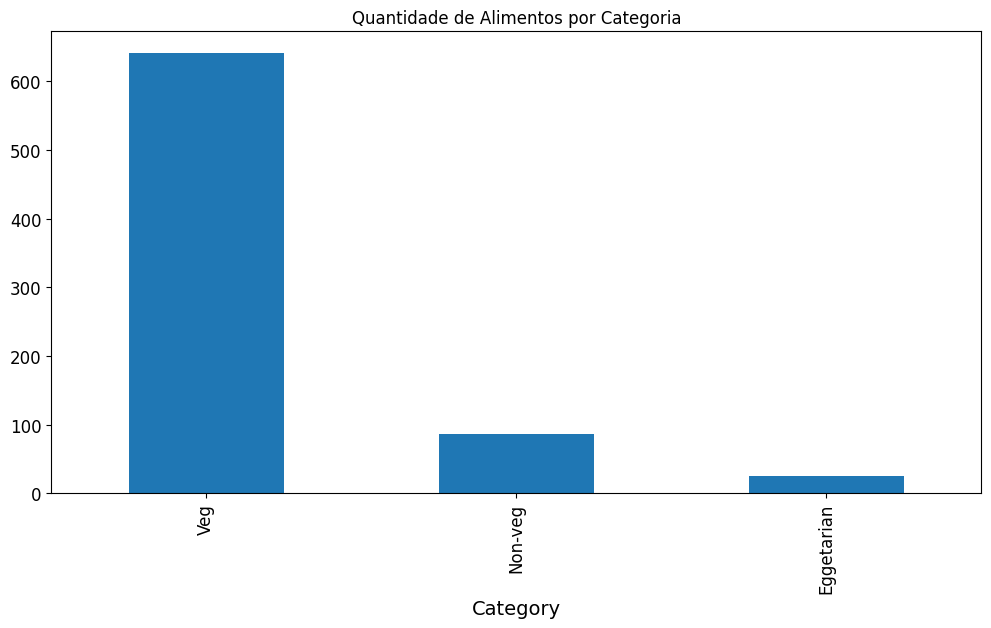

In [17]:
df['Category'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Quantidade de Alimentos por Categoria')

*Preparando os dados para a classificação:*

Se tivesse algum valor com NaN em colunas numéricas trocar pela média:

In [18]:
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_numeric_dtype(df[col]):
        median = df[col].mean()
        df[col].fillna(median, inplace=True)

df.head()


C:\Users\Samsung\AppData\Local\Temp\ipykernel_23320\2923901580.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


,Food,Associativity,Region,Type,Category,Allergy,Serving,Total Weight (gms),Energy(kcal),Proteins,Carbohydrates,Fats,Fiber,Carbon Footprint(kg CO2e),Ingredients
0,Soya flour Gobi stuffed paratha,1,"North,West","Breakfast,Lunch,Dinner",Veg,soy,2 medium,393,235,16.0,24.0,7.0,8.0,0.39450,Cauliflower-15 gms; Onion-15 gms; Ginger-4 gm...
1,DUMPLINGS (Veg),0,East,"Appetizer,Snacks",Veg,soy,4 medium,255,115,4.0,22.0,1.0,4.0,0.25955,carrot-15 gms; CABBAGE-15 gms; Capsicum-15 gms...
2,Baked Vegetables,0,Continental,Appetizer,Veg,soy,4 small,83,17,0.0,1.0,1.0,0.0,0.15840,Cauliflower-20 gms; carrot-20 gms;Capsicum-20 ...
3,LETTUCE WRAP (Chicken),0,Continental,"Lunch,Dinner",Non-veg,soy,1 medium,369,214,20.0,10.0,9.0,4.0,0.69985,Lettuce Leaf-20 gms; Chicken-70 gms; Tomato-12...
4,Soya Sizzler,6,Continental,"Lunch,Dinner",Veg,soy,1 medium,567,305,28.0,21.0,10.0,9.0,0.65800,Soyabean-30 gms; Ginger-15 gms;Garlic-15 gms; ...


Para classificar por sustentabilidade por exemplo:

In [19]:
df['sustainabilidade'] = pd.cut(df['Carbon Footprint(kg CO2e)'], bins = 3, labels=['Baixo', 'Médio', 'Alto'])
df['sustainabilidade'].value_counts()

sustainabilidade
Baixo    738
Médio     13
Alto       2
Name: count, dtype: int64

In [20]:
features = ['Proteins', 'Carbohydrates', 'Fats', 'Fiber', 'Energy(kcal)', 'Carbon Footprint(kg CO2e)']
X = df[features]
y = df['sustainabilidade']

X = X.dropna()
y = y[X.index]

print(X.shape)
print(list(X.columns))

(753, 6)
['Proteins', 'Carbohydrates', 'Fats', 'Fiber', 'Energy(kcal)', 'Carbon Footprint(kg CO2e)']


Dividindo e padronizando os dados:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(527, 6)
(226, 6)


Treinando os Algoritmos:

In [22]:
modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

In [25]:
resultados = {}
for nome, modelo in modelos.items():
    if nome in ['SVM', 'Neural Network','k-NN']:
        modelo.fit(X_train_scaled, y_train)
        previsao = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        previsao = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, previsao)
    resultados[nome] = acuracia

print(acuracia)

0.9823008849557522


Comparando os resultados:

In [27]:
resultados_ordenados = sorted(resultados.items(), key=lambda x: x[1], reverse=True)
for nome, acuracia in resultados_ordenados:
    print(f"{nome}: {acuracia:.2f}")
    
melhor_modelo = resultados_ordenados[0][0]
melhor_score = resultados_ordenados[0][1]
print(f"\nMelhor modelo: {melhor_modelo} com acurácia de {melhor_score:.2f}")


Decision Tree: 0.99
Random Forest: 0.99
Neural Network: 0.99
k-NN: 0.98
SVM: 0.97

Melhor modelo: Decision Tree com acurácia de 0.99


Gráfico para visualizar os modelos:

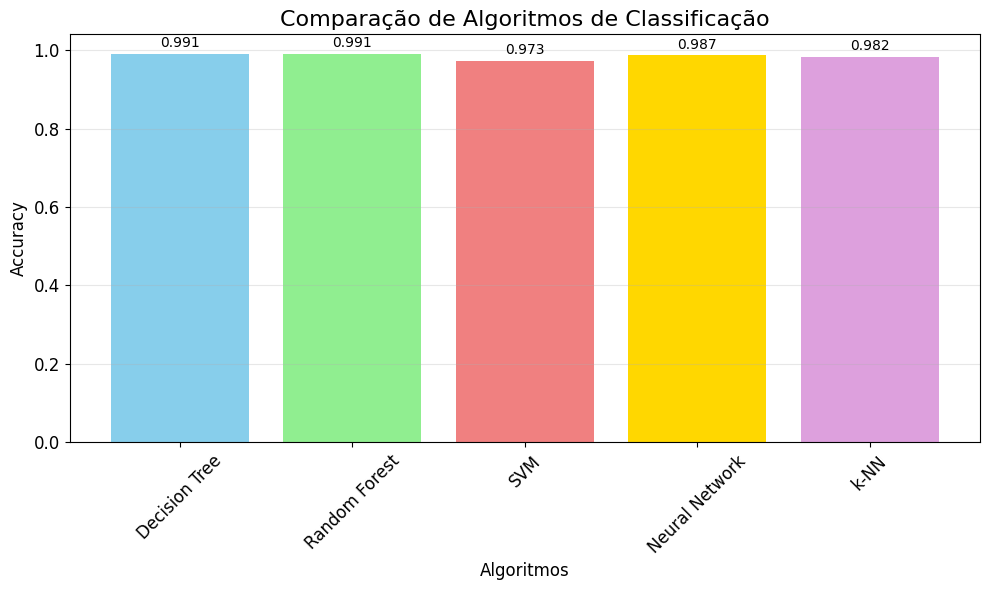

In [30]:
plt.figure(figsize=(10, 6))
nomes = list(resultados.keys())
scores = list(resultados.values())

bars = plt.bar(nomes, scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Comparação de Algoritmos de Classificação', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Algoritmos', fontsize=12)
plt.xticks(rotation=45)

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()